In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('uk_accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [6]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Accident Date'] = accident['Accident Date'].astype(str).str.strip()
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [7]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [8]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [47]:
accident['Accident Date'] = accident['Accident Date'].fillna(pd.to_datetime("1900-01-01"))
accident['Latitude']  = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Weather_Conditions']   = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
accident['Urban_or_Rural_Area']  = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [48]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
Dayoftheweek               0
dtype: int64

In [11]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['Dayoftheweek'] = accident['Accident Date'].dt.dayofweek

In [12]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
Dayoftheweek                        int32
dtype: object

<h1>UNIVARIATE ANALYSIS</h1>

In [13]:
df_2019 = accident[accident['Year'] == 2019]

In [14]:
print(f"total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

total number of accident in 2019 is 182115


Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1>QUESTION#1: How many accidents happened each month in 2019?</h1>

In [15]:
df_2019['Month'] = df_2019['Accident Date'].dt.month_name()

In [16]:
monthly_counts = df_2019['Month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

In [17]:
monthly_counts

Month
January      15355
February     13253
March        15049
April        14125
May          15833
June         15528
July         15862
August       15044
September    15271
October      15528
November     16559
December     14708
Name: count, dtype: int64

<h3>INSIGHT#1: The highest accident in month of 2019 is May with 6388 accidents or 8.89%. Followed by June with 6187 accidents or 8.61%. May and June had higher accident counts likely due to increased holiday travel, longer daylight hours, and heavier road usage during the start of summer in uk.</h3>

<h3>INSIGHT#2: The lowest accident in month of 2019 is August with 5663 accidents or 7.88%. Followed by April with 5695 accidents or 7.92%. the lowest accident counts can possibly because of school breaks, fewer work commutes, and reduced traffic during holiday periods.</h3>

<h3>INSIGHT#3: Accident numbers across months were relatively stable (around 5,600–6,300), showing no extreme seasonal spikes, though May and June were above average while April and August were below average.</h3>

<hr>
<h1>QUESTION#2: What is the distribution of Accident Severity (e.g., Fatal, Serious, Slight) in year 2019?</h1>

In [18]:
severity_counts = df_2019['Accident_Severity'].value_counts()

In [19]:
severity_counts

Accident_Severity
Slight     155079
Serious     24322
Fatal        2714
Name: count, dtype: int64

In [20]:
severity_percent = df_2019['Accident_Severity'].value_counts(normalize=True) * 100

In [21]:
severity_percent

Accident_Severity
Slight     85.154435
Serious    13.355297
Fatal       1.490267
Name: proportion, dtype: float64

<h3>INSIGHT#4: In year 2019 most of the accident severity is minor or slight with a number of 60928 accidents, which has a greater gap between serious with a 9823 accidents and fatal with 1116 accidents. The percetage of slight is almost 85% being the highest accident severity</h3>

<hr>
<h1>QUESTION#3: What is the distribution of Accident Severity (e.g., Fatal, Serious, Slight) in year 2019 for each month?</h1>

In [22]:
severity_monthly = df_2019.groupby(['Month', 'Accident_Severity']).size().unstack().fillna(0)
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

In [23]:
severity_monthly = severity_monthly.reindex(month_order)
severity_monthly

Accident_Severity,Fatal,Serious,Slight
Month,,,
January,239,2009,13107
February,173,1639,11441
March,212,1951,12886
April,231,2079,11815
May,230,1989,13614
June,201,2089,13238
July,225,2216,13421
August,260,2129,12655
September,225,2121,12925


<h3>INSIGHT#5: Slight Accident are higher in each month especially in May and June. while fatal accidents are higher during January to March. So even though the higher accidents is month of May and June they are just minor or moderate accident.</h3>

<hr>
<h1>QUESTION#4: Which district/area had the most accidents in 2019?</h1>

In [24]:
district_counts = df_2019['District Area'].value_counts()
district_counts
print("Top 5 Districts with most accidents in 2019:")
print(district_counts.head())

Top 5 Districts with most accidents in 2019:
District Area
Birmingham      3820
Leeds           2425
Manchester      1832
Glasgow City    1782
Bradford        1636
Name: count, dtype: int64


<h3>INSIGHT#5: Most accidents happened in district or area of Birmingham with 1554 accident in year 2019, there's a high gap between Birmingham and other district.</h3>

<hr>
<h1>QUESTION#5: Which Road Type has the highest number of accidents?</h1>

In [25]:
road_counts = df_2019['Road_Type'].value_counts()
road_counts

Road_Type
Single carriageway    136468
Dual carriageway       28162
Roundabout             11698
One way street          3813
Slip road               1974
Name: count, dtype: int64

In [26]:
road_percent = df_2019['Road_Type'].value_counts(normalize=True) * 100
road_percent

Road_Type
Single carriageway    74.935069
Dual carriageway      15.463855
Roundabout             6.423414
One way street         2.093732
Slip road              1.083930
Name: proportion, dtype: float64

<h3>INSIGHT#6: Single Carriageway has the highest number of accidents with 53310 or 74.18%. followed by dual carriageways with 11022 or 15.34%, showing that two-lane and multi-lane roads is a total of nearly 90% of all cases, while accidents on roundabouts, one-way streets, and slip roads were much less frequent.</h3>

<hr>

In [27]:
df_2020 = accident[accident['Year'] == 2020]

<h1>QUESTION#6: What is the daily/weekly trend of accidents in 2020?</h1>

In [28]:
daily_trend = df_2020.groupby(df_2020['Accident Date'].dt.date).size()
daily_trend.head()

Accident Date
2020-01-01    257
2020-01-02    263
2020-01-03    318
2020-01-04    410
2020-01-05    352
dtype: int64

In [29]:
highest_day = daily_trend.idxmax(), daily_trend.max()
highest_day

(datetime.date(2020, 11, 28), np.int64(659))

In [30]:
lowest_day  = daily_trend.idxmin(), daily_trend.min()
lowest_day

(datetime.date(2020, 12, 25), np.int64(118))

<h3>INSIGHT#7: In 2020, daily accident trends showed lower counts on holidays which is january 1, 2020.while weekdays consistently recorded higher accidents, averaging over 500 cases per day.</h3>

In [31]:
weekly_trend = df_2020.groupby(df_2020['Accident Date'].dt.day_name()).size().sort_values(ascending=False)
weekly_trend

Accident Date
Saturday     27387
Wednesday    26245
Thursday     25830
Friday       24948
Tuesday      24381
Sunday       23050
Monday       18750
dtype: int64

<h3>INSIGHT#8: In 2020, weekly accident trends showed lower counts on Monday,while Wednesday and Saturday has the higher counts, showing that midweek and weekend traffic contribute heavily to accidents.</h3>

<hr>
<h1>QUESTIO#7: Did the percentage of slight vs. serious vs. fatal accidents change compared to 2019?</h1>

In [32]:
severity_2019 = accident[accident['Year']==2019]['Accident_Severity'].value_counts(normalize=True) * 100
severity_2020 = accident[accident['Year']==2020]['Accident_Severity'].value_counts(normalize=True) * 100
compare = pd.DataFrame({"2019": severity_2019, "2020": severity_2020, "Change (%)": severity_2020 - severity_2019})
compare

,2019,2020,Change (%)
Accident_Severity,,,
Slight,85.154435,85.074242,-0.080193
Serious,13.355297,13.553470,0.198173
Fatal,1.490267,1.372288,-0.117979


<h3>INSIGHT#9: The slight accidents increased slightly from 84.78% in 2019 to 85.34% in 2020 (+0.56%), showing most accidents remained minor.</h3>

<h3>INSIGHT#10: The Serious accidents remain consistent with 13% only decreased in 2020 with -0.35%, showing that there's no changes in accident severity. Same with fatal accidents which remain with 1% only decreased in 2020 with -0.21%</h3>

<HR>
<h1>QUESTION#8: What is the distribution of accidents by Weather Conditions in year 2020?</h1>

In [33]:
weather_2020 = df_2020['Weather_Conditions'].value_counts(normalize = True) * 100
weather_2020

Weather_Conditions
Fine no high winds       79.986635
Raining no high winds    12.886964
Other                     2.500132
Raining + high winds      1.834798
Fine + high winds         1.677111
Fog or mist               0.575060
Snowing no high winds     0.421476
Snowing + high winds      0.117826
Name: proportion, dtype: float64

<h3>INSIGHT#11: Most accidents which is 75.3% happened in fine weather without high winds, showing that good weather doesn’t guarantee road safety.</h3>

<h3>INSIGHT#12: Rainy conditions with and without high winds contributed to a total of 16.4% of accidents, highlighting the impact of wet roads on crash risk.</h3>

<h3>INSIGHT#13: Extreme weather such as snow 0.8% and fog 0.5% played only a minor role, meaning accidents occur more often in normal conditions than in severe weather.</h3>

<HR>
<h1>QUESTION#9: Is there a correlation between the number of vehicles involved and the number of casualties in 2020</h1>

In [34]:
vehicles_casualties_corr = df_2020['Number_of_Vehicles'].corr(df_2020['Number_of_Casualties'])
vehicles_casualties_corr

np.float64(0.22326073710789965)

<h3>INSIGHT#14: The correlation is positive but weak, there's a slight correlation between number of vehicles and number of casualties. But there are other more reason for the number of casualties.</h3>

<h1>QUESTION#10: Is there a correlation between Weather Conditions and Accident Severity in 2020?</h1>

In [35]:
from scipy.stats import chi2_contingency

In [38]:
contingency = pd.crosstab(df_2020['Weather_Conditions'], df_2020['Accident_Severity'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
chi2

np.float64(124.56031026589383)

In [39]:
p_value

np.float64(8.01753460908664e-20)

<h3>INSIGHT#15: There is a significant correlation between weather conditions and accident severity in 2020, rain, snow or fog can cause serious or fatal accidents.</h3>

<HR></HR>
<h1>QUESTION#11: Which vehicle type was most frequently involved in accidents in 2021?</h1>

In [40]:
df_2021 = accident[accident['Year'] == 2021]

In [43]:
vehicle_acc = df_2021['Vehicle_Type'].value_counts(normalize=True) * 100
vehicle_acc

Vehicle_Type
Car                                      78.277511
Van / Goods 3.5 tonnes mgw or under       4.956161
Motorcycle over 500cc                     3.735769
Bus or coach (17 or more pass seats)      2.540445
Goods 7.5 tonnes mgw and over             2.182154
Motorcycle 125cc and under                2.001174
Taxi/Private hire car                     1.653888
Motorcycle 50cc and under                 1.203272
Motorcycle over 125cc and up to 500cc     1.170867
Other vehicle                             0.868215
Goods over 3.5t. and under 7.5t           0.852929
Agricultural vehicle                      0.275138
Minibus (8 - 16 passenger seats)          0.256796
Pedal cycle                               0.024457
Ridden horse                              0.001223
Data missing or out of range              0.000000
Name: proportion, dtype: float64

<h3>INSIGHT#16: Car are most frequently involved in accidents by the year of 2021 with over 51745 or 78.2%, there's a huge gap in car and other vehicle type. </h3>

<hr>
<h1>QUESTION#12: In what area commonly has the most car involved in accidents in year 2021?</h1>

In [51]:
car_accidents_2021 = accident[(accident['Year'] == 2021) & (accident['Vehicle_Type'] == 'Car')]
car_area_counts = car_accidents_2021['District Area'].value_counts().head(5)
car_area_counts

District Area
Birmingham    2609
Leeds         1760
Manchester    1417
Bradford      1255
Sheffield     1212
Name: count, dtype: int64

<h3>INSIGHT#17: The area has the most car involved in accidents is Birmingham with 2609 cars accidents. Followed by Leeds with 1760 accidents. The information above are the top 5 with the most car accidents area. </h3>

<hr>
<h1>QUESTION#13: In what area has the most fatalities car accident in year 2021?</h1>

In [65]:
fatalities_car_2021 = accident[(accident['Year'] == 2021) & (accident['Vehicle_Type'] == 'Car') & (accident['Accident_Severity'] == 'Fatal')]
fatalities_count = fatalities_car_2021['District Area'].value_counts().reset_index()
fatalities_count.head()

,District Area,count
0,Birmingham,23
1,Highland,19
2,Wiltshire,19
3,Shropshire,18
4,Bradford,17


<h3>INSIGHT#18: Based on the data above Birmingham area has the most fatal car accidents same with the result above in which car accidents in the same area has the most involved. But unlike the first result leeds is second with the most involved car accidents but in this area Highland is top 2 in fatalities car accidents. Therefore even though leeds has the second most involved car it might fall into serious and slight accidents. </h3>

<hr>
<h1>QUESTION#14: What proportion of accidents occurred in urban vs. rural areas in 2022?</h1>

In [73]:
accident_2022 = accident[accident['Year'] == 2022]
accident_urban_rural = accident_2022['Urban_or_Rural_Area'].value_counts(normalize=True) * 100
accident_urban_rural

Urban_or_Rural_Area
Urban          65.084234
Rural          34.915766
Unallocated     0.000000
Name: proportion, dtype: float64

<h3>INSIGHT#19: Urban has the most accident number with 65% , while Rural has only half of urban accident with a number of 34.9%. It means that urban is more prone on accidents maybe because of traffic and high number of vehicle in cities.</h3>

<hr>
<h1>QUESTION#15: How did the severity distribution (fatal, serious, slight) differ between urban and rural areas in 2022?</h1>

In [71]:
severity_2022 = accident_2022.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size()
severity_2022

Urban_or_Rural_Area  Accident_Severity
Rural                Fatal                 1010
                     Serious               7707
                     Slight               41708
Unallocated          Fatal                    0
                     Serious                  0
                     Slight                   0
Urban                Fatal                  539
                     Serious              11070
                     Slight               82385
dtype: int64

<h3>INSIGHT#20: Based on the data above, Rural has the most high number of fatality than urban even though urban has the most accidents. Rural has 1010 fatal accidents, while Urban has almost half of rural which is 539 accidents.</h3>

<H3>INSIGHT#21: Serious accidents happened on urban with a number of 11070 accidents, while Rural has 7707 serious accidents.</H3>

<H3>INSIGHT#22: Slight accidents mostly happened on urban with a number of 82385 accidents, while Rural has only 41708 serious accidents. It means that Urban most accidents is slight or serious than fatal same with rural area the difference is the total of accidents happened in urban and rural aswell as the distribution of the number of severity accidents.</H3>

<hr>
<h1>QUESTION#16: Did accidents increase or decrease overall from 2019 to 2022?</h1>

In [76]:
yearly_accident = accident.groupby(['Year']).size()
yearly_accident

Year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<h3>INSIGHT#23: The accidents decrease from 2019 with 182115 accidents to 2022 with 144419 accidents. There is almost 4000 accidents difference from 2019-2022 maybe because of pandemic restrictions and advancedment of mobility and road.</h3>

<HR></HR>
<h1>QUESTION#17: Which month consistently had the highest number of accidents across years?</h1>

In [84]:
monthly_accidents = accident.groupby(['Year', 'Month']).size().unstack()
monthly_accidents

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,15355,13253,15049,14125,15833,15528,15862,15044,15271,15528,16559,14708
2020,14133,14353,13494,13394,14336,14205,14630,13366,14432,15684,14770,13794
2021,13417,10950,13202,12715,13811,13936,14300,13415,13792,14834,15473,13709
2022,9967,10935,12341,11510,12372,12812,12653,12088,12960,13534,13622,9625


<h3>INSIGHT#24: October–November consistently record the highest accidents, while February–April are lower. </h3>

<hr>
<h1>QUESTION#18: Did rural areas consistently have a higher proportion of fatal accidents compared to urban areas?</h1>

In [87]:
severity_area = (accident.groupby(['Year', 'Urban_or_Rural_Area', 'Accident_Severity']).size().reset_index(name='Count'))
totals = severity_area.groupby(['Year', 'Urban_or_Rural_Area'])['Count'].transform('sum')
fatal_area = severity_area[severity_area['Accident_Severity'] == 'Fatal']
fatal_area

,Year,Urban_or_Rural_Area,Accident_Severity,Count
0,2019,Rural,Fatal,1773
3,2019,Unallocated,Fatal,0
6,2019,Urban,Fatal,941
9,2020,Rural,Fatal,1495
12,2020,Unallocated,Fatal,0
15,2020,Urban,Fatal,846
18,2021,Rural,Fatal,1323
21,2021,Unallocated,Fatal,0
24,2021,Urban,Fatal,734
27,2022,Rural,Fatal,1010


<h3>INSIGHT#25: The answer is yes, Rural consistently has the higher fatal accidents compared to urban areas. In 2019 1773 accidents record fatalities, while 2020 1495 accidents, 2021 1323 accidents, lastly is 2022 with 1010 accidents.</h3>

<h1>TRYING VISUALIZATION</h1>

In [88]:
import matplotlib.pyplot as plt

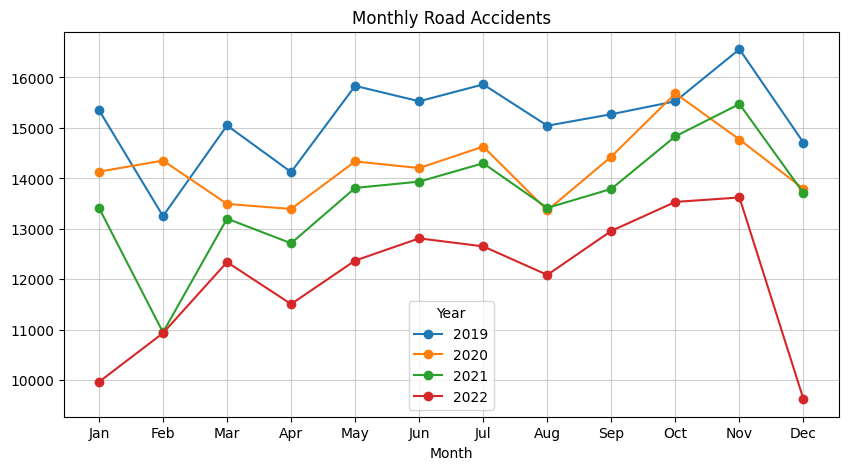

In [90]:
monthly_data = accident.groupby(['Year', 'Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(marker = 'o', figsize =(10,5), title='Monthly Road Accidents')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.6)
plt.show()

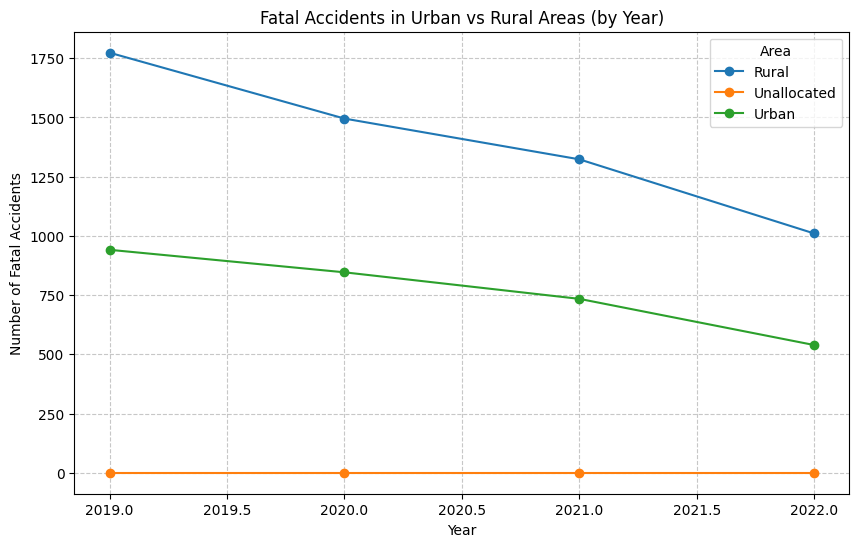

In [93]:
severity_area = (accident.groupby(['Year', 'Urban_or_Rural_Area', 'Accident_Severity']).size().reset_index(name='Count'))
totals = severity_area.groupby(['Year', 'Urban_or_Rural_Area'])['Count'].transform('sum')
fatal_area = severity_area[severity_area['Accident_Severity'] == 'Fatal']

fatal_pivot = fatal_area.pivot(index='Year', columns='Urban_or_Rural_Area', values='Count')

plt.figure(figsize=(10,6))
for area in fatal_pivot.columns:
    plt.plot(fatal_pivot.index, fatal_pivot[area], marker='o', label=area)

plt.title('Fatal Accidents in Urban vs Rural Areas (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.legend(title="Area")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

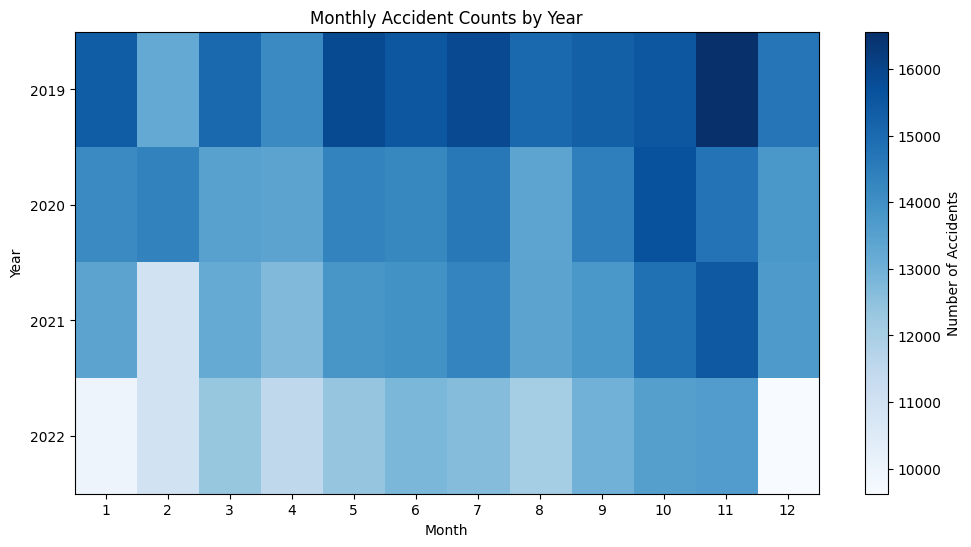

In [96]:
monthly_accidents = accident.groupby(['Year', 'Month']).size().unstack()
monthly_accidents

plt.figure(figsize=(12,6))
plt.imshow(monthly_accidents, aspect='auto', cmap='Blues')
plt.colorbar(label='Number of Accidents')
plt.xticks(range(12), monthly_accidents.columns)
plt.yticks(range(len(monthly_accidents.index)), monthly_accidents.index)
plt.title('Monthly Accident Counts by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()